In [1]:
import pandas as pd
import geopandas as gpd
from eumap.misc import find_files, nan_percentile, GoogleSheet, ttprint
from eumap.raster import read_rasters, save_rasters
from eumap.mapper import SpaceOverlay
from pathlib import Path

In [2]:
## sub-sample the points
years = [2000,2004,2008,2012,2016,2020,2022]

# fn = []
# for iy in range(1,len(years)):
#     start = years[iy-1]
#     end = years[iy]
#     fne = [f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3_m_30m_b0cm..20cm_{start}0101_{end}1231_eu_epsg.3035_v20240804.tif',
#            f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3_p025_30m_b0cm..20cm_{start}0101_{end}1231_eu_epsg.3035_v20240804.tif',
#            f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3_p975_30m_b0cm..20cm_{start}0101_{end}1231_eu_epsg.3035_v20240804.tif']
#     fn.extend(fne)
    
# fn = [Path(ii) for ii in fn]
# sub = gpd.read_file(f'/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series_points.shp')
# sub = sub.to_crs(epsg=3035)
# temp = SpaceOverlay(
#         points=sub, 
#         fn_layers=fn, verbose=True
# ).run()

# fn = [str(a) for a in fn]
# fname = ['ocd_' + a.split('_')[2] + '_' + a.split('_')[5][0:4] + '.' + a.split('_')[6][0:4] for a in fn]
# fn = [ii.split('/')[-1][0:-4] for ii in fn]
# name_map = dict(zip(fn,fname))
# temp = temp.rename(columns = name_map)

# temp = temp.drop(columns=['overlay_id'])
# temp.to_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series_ocd.csv',index=False)

temp = pd.read_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series_ocd.csv',low_memory=False)

In [3]:

ml = ['ocd_m_2000.2004',
 'ocd_m_2004.2008',
 'ocd_m_2008.2012',
 'ocd_m_2012.2016',
 'ocd_m_2016.2020',
 'ocd_m_2020.2022']

p975l = [ii.replace('_m_','_p975_') for ii in ml]
p025l = [ii.replace('_m_','_p025_') for ii in ml]
time = [2002, 2006, 2010, 2014, 2018, 2021]
time_label = ['2000-2004','2004-2008','2008-2012','2012-2016','2016-2020','2020-2022']


In [4]:
temp['label'] = ['Cropland','Woodland','Woodland','Woodland']
temp['code'] = ['X','Y','Y','Y']

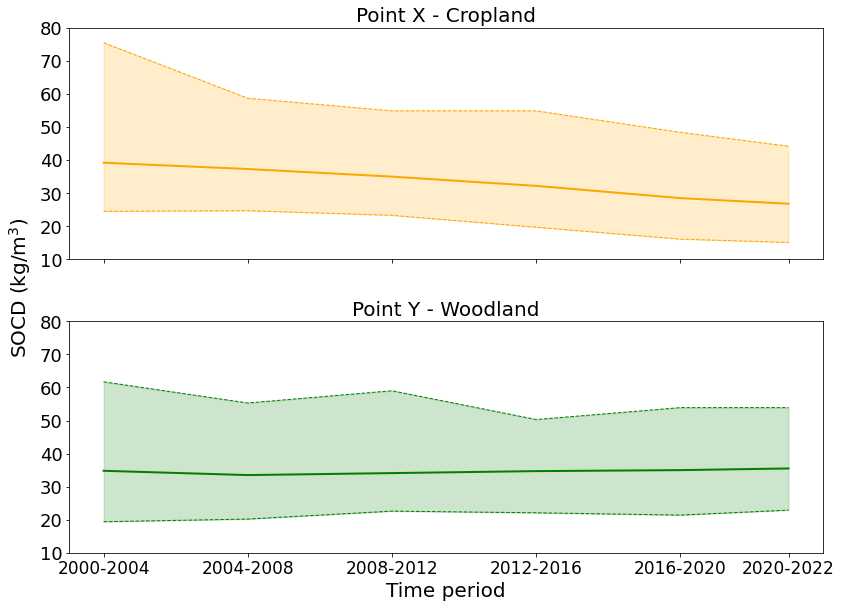

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the columns to numeric, coercing any errors
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,9), sharey=True)

for idx, ii in enumerate([0, 2]):
    mean_values = temp.iloc[ii][ml] / 10
    upper_bounds = (temp.iloc[ii][p975l] / 10).values.tolist()
    lower_bounds = (temp.iloc[ii][p025l] / 10).values.tolist()

    label = temp.iloc[ii]['label']
    code = temp.iloc[ii]['code']
    if label == 'Woodland':
        color = 'green'
    elif label == 'Cropland':
        color = 'orange'
    else:
        color = 'blue'  # Default color if the label is something else

    # Plot on the corresponding subplot axis
    axes[idx].plot(time, mean_values, label=label, color=color, linewidth=2)
    axes[idx].fill_between(time, lower_bounds, upper_bounds, color=color, alpha=0.2)
    axes[idx].plot(time, upper_bounds, '--', color=color, linewidth=1)
    axes[idx].plot(time, lower_bounds, '--', color=color, linewidth=1)
    
    # Plot settings for each subplot
    axes[idx].set_xticks(time)
    if idx == 1:  # Only show x-tick labels on the bottom subplot
        axes[idx].set_xticklabels(time_label, fontsize=17)
        axes[idx].set_xlabel('Time period', fontsize=20)
    else:  # Hide x-tick labels for the top subplot
        axes[idx].tick_params(labelbottom=False)
    # axes[idx].grid(True)
    axes[idx].set_title(f'Point {code} - {label}', fontsize=20)

    # Set the y-ticks and y-tick labels with proper font size on the shared y-axis
    yticks = axes[idx].get_yticks().astype(int)  # Round y-ticks to integers
    axes[idx].set_yticks(yticks)
    axes[idx].set_yticklabels(yticks, fontsize=18)

# Add a common y-axis label for both plots
fig.text(0.04, 0.5, 'SOCD (kg/m$^3$)', va='center', rotation='vertical', fontsize=20, ha='center')

# Adjust layout to add some space between subplots
plt.tight_layout(rect=[0.05, 0, 1, 0.95], h_pad=3)  # h_pad adds space between subplots

# Save the plot as an SVG file
plt.savefig("/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series.svg", format='svg')

# Show the plot
plt.show()





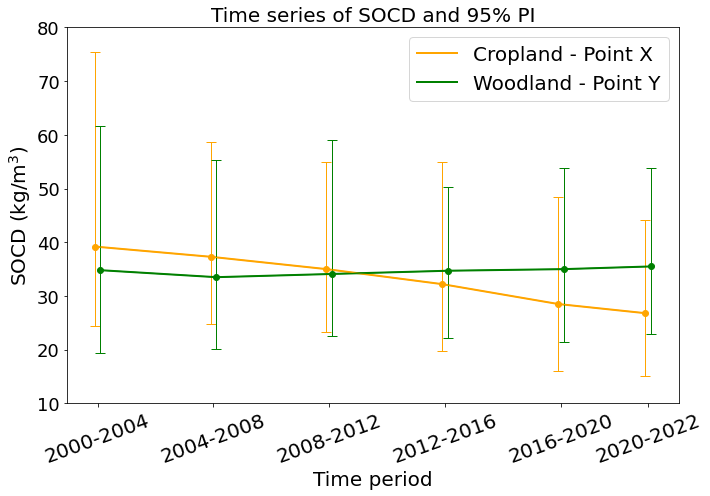

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

# Offset values for time to space the plots slightly apart
offsets = [-0.1, 0.1]  # Adjust these offsets to space the error bars

# Loop through the two sets of data and plot them on the same axes with linked error bars
for idx, ii in enumerate([0, 2]):
    mean_values = temp.iloc[ii][ml] / 10
    upper_bounds = (temp.iloc[ii][p975l] / 10).values.tolist()
    lower_bounds = (temp.iloc[ii][p025l] / 10).values.tolist()
    error = [mean_values - lower_bounds, upper_bounds - mean_values]  # Calculate the error bars

    label = temp.iloc[ii]['label']
    code = temp.iloc[ii]['code']
    
    # Set colors based on label
    if label == 'Woodland':
        color = 'green'
    elif label == 'Cropland':
        color = 'orange'
    else:
        color = 'blue'  # Default color for other labels

    # Plot mean values with lines linking the points and error bars
    ax.plot([t + offsets[idx] for t in time], mean_values, label=f'{label} - Point {code}', color=color, linewidth=2)
    ax.errorbar(
        [t + offsets[idx] for t in time], mean_values, yerr=error, 
        color=color, fmt='o', capsize=5, elinewidth=1, linestyle='-', linewidth=1
    )

# Customize x-ticks and labels
ax.set_xticks(time)
ax.set_xticklabels(time_label, fontsize=20, rotation=20)
ax.set_xlabel('Time period', fontsize=20)

# Customize y-ticks and labels
yticks = ax.get_yticks().astype(int)  # Round y-ticks to integers
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=18)
plt.title('Time series of SOCD and 95% PI', fontsize=20)

# Add labels and title
ax.set_ylabel('SOCD (kg/m$^3$)', fontsize=20)
ax.legend(fontsize=20)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig("/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series.svg", format='svg')

# Show the plot
plt.show()

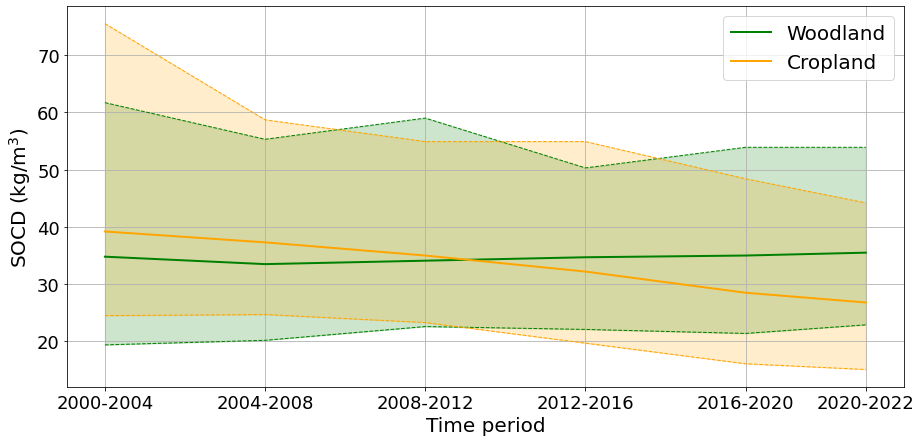

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the columns to numeric, coercing any errors
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Create the plot
plt.figure(figsize=(15, 7))

# Loop over selected rows
for ii in [2,0]:
    mean_values = temp.iloc[ii][ml] / 10
    upper_bounds = (temp.iloc[ii][p975l] / 10).values.tolist()
    lower_bounds = (temp.iloc[ii][p025l] / 10).values.tolist()

    label = temp.iloc[ii]['label']
    if label == 'Woodland':
        color = 'green'
    elif label == 'Cropland':
        color = 'orange'
    else:
        color = 'blue'  # Default color if the label is something else

    plt.plot(time, mean_values, label=label, color=color, linewidth=2)
    plt.fill_between(time, lower_bounds, upper_bounds, color=color, alpha=0.2)
    plt.plot(time, upper_bounds, '--', color=color, linewidth=1)
    plt.plot(time, lower_bounds, '--', color=color, linewidth=1)
    

# Plot settings
plt.xticks(time, time_label, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time period', fontsize=20)
plt.ylabel('SOCD (kg/m$^3$)', fontsize=20)
plt.grid(True)

# Adjusting the legend
plt.legend(fontsize=20, loc='upper right', frameon=True)
plt.savefig("/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_time.series/plot_time.series.svg", format='svg')
plt.show()